# 2. Data Preparation and processing

**Now we can prepare the data for analysis.**

**First of all, Column 'Unnamed: 0' seems useless. Let's drop that column.**

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## 2.1. Missing values

**Now we can calculate the percentage of empty values per feature.**

In [5]:
df.isna().sum().divide(len(df)).round(4)*100

model            0.00
year             0.00
price            0.00
transmission     0.00
mileage         10.05
fuelType         0.99
tax              4.97
mpg              0.00
engineSize      19.98
make             0.00
dtype: float64

**'fuelType' is a column with string values. It is hard to choose something to fill in for these empty values
and guessing could pollute our dataset. Furthermore it only has 0.99% missing values.
Therefore we can safely delete these empty rows.**

In [6]:
df.dropna(subset=['fuelType'], inplace=True)

**I chose KNN imputation to fill in the empty values for the other features,
as this is generally a better way to predict empty values than mean or median imputation.
To do this I temporarily removed the textual columns to be able to run the KNNImputer Algorithm**

In [7]:
df_num = df.drop(['transmission','model','fuelType','make'], axis=1, inplace=False)

**Next, I created the KNNimputer and used it to fill in the 'engineSize', 'mileage' and 'tax' columns.**

In [8]:
from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer()
df_imputed = imputer.fit_transform(df_num)  # impute all the missing data
df_temp = pd.DataFrame(df_imputed)
df_temp.columns = df_num.columns

# Return to the original dataframe with textual fields included and update only the desired columns
df['engineSize'] = df_temp['engineSize'].values
df['mileage'] = df_temp['mileage'].values
df['tax'] = df_temp['tax'].values

**Let's check:**

In [9]:
df.isna().sum().divide(len(df)).round(4)*100

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
make            0.0
dtype: float64

**Great, no more missing values.**

## 2.2 Removing duplicates

**Next step is to drop duplicates if there are any.**

In [10]:
df.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,A1,2017,12500,Manual,23925.4,Petrol,150.0,55.4,1.40,audi
1,A6,2016,16500,Automatic,36203.0,Diesel,30.0,64.2,2.00,audi
2,A1,2016,11000,Manual,29946.0,Petrol,30.0,55.4,1.40,audi
3,A4,2017,16800,Automatic,25952.0,Diesel,145.0,67.3,1.70,audi
4,A3,2019,17300,Manual,1998.0,Petrol,145.0,49.6,1.00,audi
...,...,...,...,...,...,...,...,...,...,...
85550,Eos,2012,5990,Manual,74000.0,Diesel,125.0,58.9,2.00,vw
85551,Fox,2008,1799,Manual,88102.0,Petrol,145.0,46.3,1.78,vw
85552,Fox,2009,1590,Manual,70000.0,Petrol,189.0,42.0,1.40,vw
85553,Fox,2006,1250,Manual,82704.0,Petrol,150.0,46.3,1.20,vw


## 2.3 Anomalies and outliers

**Now let's look for anomalies and outliers. They have to be removed, as they can impact the quality of the prediction.**

**A simple yet effective way to check for anomalies is to use a boxplot to visuale the data.
Some possible outliers are listed below.**

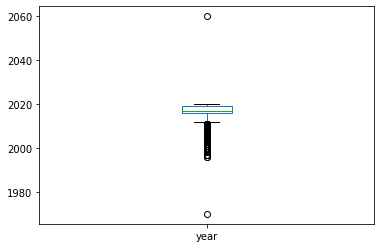

In [11]:
df['year'].plot(kind='box');

**A car from 2060 is ofcourse not possible, it must be an error so it can safely be removed.**

In [12]:
df = df[df['year'] != 2060]

**Now let's look at the outlier at the bottom of the boxplot.**

In [13]:
df.loc[df['year'] < 1980]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
56346,M Class,1970,24999,Automatic,14000.0,Diesel,305.0,39.2,0.0,merc


**The first mercedes M class was made in 1997, so 1970 is not a possible year. Let's remove this row as well.**

In [14]:
df = df[df['year'] != 1970]

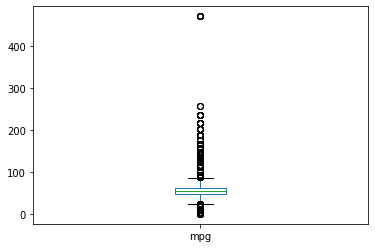

In [15]:
df['mpg'].plot(kind='box');

**Some outliers at the top of the 'mpg' boxplot, let's check.**

In [16]:
df.loc[df['mpg'] > 400]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
10700,i3,2016,17100,Automatic,25269.0,Other,0.0,470.8,0.60,bmw
11289,i3,2017,19998,Automatic,41949.0,Hybrid,140.0,470.8,0.00,bmw
11446,i3,2017,19998,Automatic,27591.2,Hybrid,0.0,470.8,0.00,bmw
11448,i3,2017,21898,Automatic,10839.0,Hybrid,0.0,470.8,1.32,bmw
12534,i3,2017,19980,Automatic,26965.0,Hybrid,140.0,470.8,0.00,bmw
13020,i3,2016,19490,Automatic,8421.0,Hybrid,0.0,470.8,0.00,bmw
13945,i3,2016,16482,Automatic,43695.0,Hybrid,0.0,470.8,0.00,bmw
14296,i3,2015,14285,Automatic,65800.0,Hybrid,0.0,470.8,0.00,bmw
14581,i3,2017,18500,Automatic,36429.0,Hybrid,116.0,470.8,0.00,bmw
14768,i3,2017,19495,Automatic,17338.0,Hybrid,88.0,470.8,0.00,bmw


**It looks like these are all BMW i3 cars. The reason for these high mpg values might be the fact that these vehicles are very small and run mainly on electricity, so they don't use a lot of petrol. I chose not to remove these rows as they might contain valuable information, but we have to keep these outliers in mind in further processing.**

## 2.4. One-hot encoding

**I tried one-hot encoding to convert class variables into binary ones to be able to involve them into predidictive algorithms, but found out they mostly had a negative impact on prediction quality, hence the fact that they are commented out (not used).**

**Of course I could have optimized for this by using other techniques to improve the quality of encoding, but I just chose not to use these features in predictions. Because time is limited and nothing is perfect. ;)** 

In [17]:
print(df['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [18]:
#transmission = df.pop('transmission')
#df['automatic'] = (transmission == 'Automatic')*1.0
#df['semi-auto'] = (transmission == 'Semi-Auto')*1.0
#df['manual'] = (transmission == 'Manual')*1.0

In [19]:
print(df['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


In [20]:
#fueltype = df.pop('fuelType')
#df['petrol'] = (fueltype == 'Petrol')*1.0
#df['diesel'] = (fueltype == 'Diesel')*1.0
#df['hybrid'] = (fueltype == 'Hybrid')*1.0